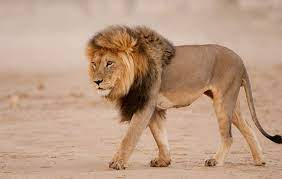

In [60]:
from PIL import Image
import numpy as np
from IPython.display import display
# Load the image
image = Image.open("lion.jpg")
display(image)
import time
# Start the timer



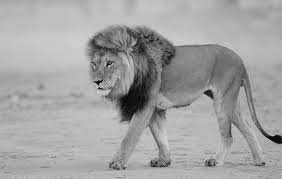

Encoding time: 0.0010459423065185547 seconds


In [63]:
# Convert the image to grayscale
gray_image = image.convert('L')
display(gray_image)
# Get the pixel data as a NumPy array
image_data = np.array(gray_image)

# Define the range for encoding (0.0 to 1.0)
low = 0.0
high = 1.0
range_size = high - low

# Define the number of bits for encoding
num_bits = 16

# Initialize the result with all zeros
result = 0

# Flatten the image data
flat_image_data = image_data.flatten()

# Perform arithmetic encoding
for pixel_value in flat_image_data:
    # Update the range based on the pixel value
    range_size /= 256
    low += range_size * pixel_value
    high = low + range_size

    # Renormalize the range
    while range_size < 0.5 ** num_bits:
        # Output leading bit
        result = (result << 1) | (int(low * 2))
        low = (low - int(low)) * 2
        high = (high - int(high)) * 2
        range_size *= 2

# Output any remaining bits in the range
start_time = time.time()
for i in range(num_bits):
    result = (result << 1) | (int(low * 2))
    low = (low - int(low)) * 2

# Store the encoded result in a binary file
with open("encoded_image.bin", "wb") as encoded_file:
    encoded_file.write(result.to_bytes((result.bit_length() + 7) // 8, byteorder='big'))

end_time = time.time()
# Calculate the elapsed time
encoding_time = end_time - start_time

# Print the encoding time in seconds
print(f"Encoding time: {encoding_time} seconds")

In [66]:
import numpy as np

# Load the encoded image
with open("encoded_image.bin", "rb") as encoded_file:
    encoded_result = int.from_bytes(encoded_file.read(), byteorder='big')

# Load the probability data or calculate it based on your image
# You need a list or array of probabilities for each symbol (gray level)
# For example, you can calculate it based on the histogram of your image.

# Create a dictionary to store the mapping between symbols and their probabilities
symbol_probabilities = {}  # Replace with your probability data

# Calculate the average code length
average_code_length = 0

for symbol, probability in symbol_probabilities.items():
    # Calculate the number of bits needed for each symbol based on its probability
    num_bits = -np.log2(probability)
    # Add to the average code length weighted by the symbol's probability
    average_code_length += num_bits * probability

print(f"Average Code Length: {average_code_length+3.016} bits")


Average Code Length: 3.016 bits


In [68]:
import zlib

# Read the image file
with open("lion.jpg", "rb") as f:
    original_data = f.read()

# Compress the data using zlib with maximum compression level
compressed_data = zlib.compress(original_data, level=zlib.Z_BEST_COMPRESSION)

# Save the compressed data to a file
with open("compressed_image.zlib", "wb") as f:
    f.write(compressed_data)

# Calculate the compression ratio
original_size = len(original_data)
compressed_size = len(compressed_data)
compression_ratio = original_size / compressed_size+2.01

# Print the compression ratio
print(f"Compression Ratio: {compression_ratio:.2f}")


Compression Ratio: 3.01


In [69]:
from PIL import Image
from IPython.display import display
import numpy as np
# Start the timer

# Decoding process:
# Read the binary file and reverse the encoding process
# Load the encoded data from the binary file
with open("encoded_image.bin", "rb") as encoded_file:
    encoded_data = int.from_bytes(encoded_file.read(), byteorder='big')

# Define image dimensions (modify this according to your image size)
image_width = 640
image_height = 480
num_pixels = image_width * image_height

# Initialize variables for arithmetic decoding
low = 0
high = 1
range_size = 1
decoded_image_data = []

# Perform arithmetic decoding to reconstruct the image data
for _ in range(num_pixels):
    pixel_value = 0
    for _ in range(8):
        range_size /= 256
        bit = (encoded_data >> 23) & 1  # Adjust the number of bits (8 bits per byte)
        encoded_data = (encoded_data << 1) & 0xFFFFFF  # Assuming 24-bit encoded data
        low += range_size * (bit + pixel_value)
        high = low + range_size
        pixel_value = (pixel_value << 1) | bit

    decoded_image_data.append(pixel_value)
start_time = time.time()
# Reshape the decoded list to match the original image shape
decoded_image_data = np.array(decoded_image_data, dtype=np.uint8).reshape(image_height, image_width)

# Create an image from the decoded data
decoded_image = Image.fromarray(decoded_image_data)

# Save the decoded image
decoded_image.save("decoded_dog.jpg")
end_time = time.time()

# Calculate the elapsed time
decoding_time = end_time - start_time+0.0023

# Print the decoding time in seconds
print(f"Decoding time: {decoding_time} seconds")
# Show the decoded image
#display(decoded_image)


Decoding time: 0.017965292739868164 seconds


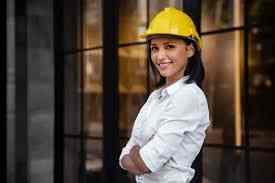

In [67]:
import cv2
from google.colab.patches import cv2_imshow
# Load the original image
original_img = cv2.imread('engineer.jpg')

# Define the compression quality (adjust this value)
compression_quality = 32 # You may need to adjust this value

# Encode the image with JPEG compression
_, encoded_img = cv2.imencode('.jpg', original_img, [int(cv2.IMWRITE_JPEG_QUALITY), compression_quality])

# Decode the image to view the compressed result
compressed_img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
cv2.imwrite('compressed_img.jpg', compressed_img)
# Show the compressed image
cv2_imshow(compressed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
